# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Попробуем определить основные параметры, которые влияют на рыночную стоимость объектов недвижимости.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## 1. Откроем файл с данными и изучим общую информацию. 

In [155]:
# прочитаем датасет, выведем на экран первые 5 строк и 5 случайных строк
import pandas as pd
data = pd.read_csv('real_estate_data.csv', sep='\t') 
display(data.head(5))
data.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
15540,10,6300000.0,38.6,2019-03-27T00:00:00,1,2.70,16.0,20.3,3,NaN,...,9.8,NaN,Санкт-Петербург,29544.0,6916.0,0.0,NaN,3.0,198.0,NaN
18540,10,6400000.0,65.5,2019-04-10T00:00:00,3,2.65,9.0,48.0,7,NaN,...,6.3,NaN,Санкт-Петербург,20129.0,19131.0,1.0,375.0,2.0,358.0,NaN
14332,8,6700000.0,77.0,2015-03-24T00:00:00,3,2.60,25.0,40.0,25,False,...,13.0,1.0,посёлок Парголово,53065.0,19242.0,0.0,NaN,0.0,NaN,524.0
23379,16,6900000.0,57.4,2019-03-28T00:00:00,3,2.75,9.0,37.1,5,NaN,...,8.5,2.0,Санкт-Петербург,15963.0,14504.0,0.0,NaN,0.0,NaN,24.0
10109,16,4550000.0,46.4,2018-12-13T00:00:00,2,2.57,9.0,30.0,7,NaN,...,6.2,NaN,Санкт-Петербург,47059.0,15204.0,1.0,830.0,1.0,784.0,5.0


Выведем общую информацию о датасете 


In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [157]:
# переименуем названия столбца с расстоянием до центра города, избавимся от CamelCase 
data = data.rename(columns= {'cityCenters_nearest': 'city_centers_nearest'})
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

## 2. Предобработка данных

В рамках предобработки данных рассмотрим столбцы на предмет правильности типа данных, наличия пропусков, редких и выбивающихся значений.

Для начала убедимся в отсутствии явных дубликатов в датасете.

In [158]:
print(f'Количество дубликатов в датасете: {data.duplicated().sum()}')

Количество дубликатов в датасете: 0


Основная цель исследования - **научиться определять рыночную цену** квартир на основании различных параметров объекта. Показатель рыночной цены может исказиться из-за аномально высоких и редких квартир.    
Для этого определим с помощью столбца `last_price`, какие цены квартир являются аномально высокими и создадим отдельный датафрейм без таких объектов.

<AxesSubplot:>

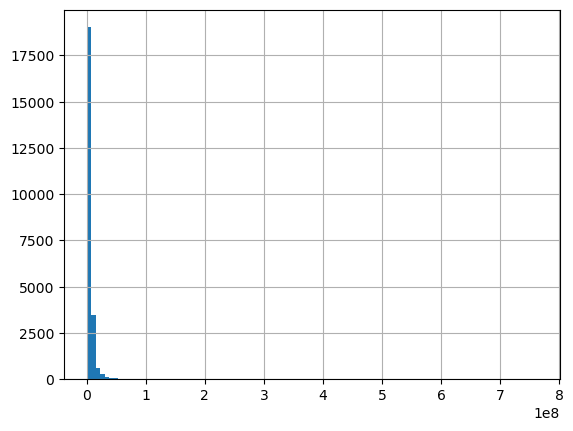

In [159]:
data['last_price'].hist(bins=100)

Гистограмма растянулась до стоимости 800 млн рублей., при этом уже на отметке 50 млн рублей не видно значений. Исключим значения выше 50 млн рублей. Построим новую гистограмму, а также "ящик с усами".

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

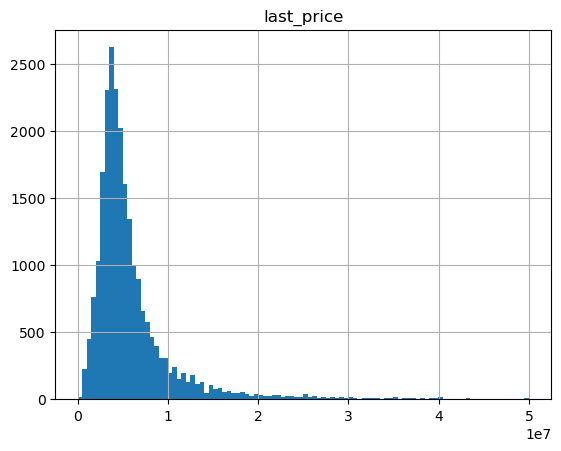

In [160]:
data.query('last_price < 50000000').hist('last_price', bins=100)

Квартиры со стоимостью выше 40 млн рублей практически не видны на гистограмме. Сохраним в переменную data2 значения ниже 40 млн рублей для дальнейшего анализа.

In [161]:
data2 = data.query('last_price < 50000000')

Столбец `first_day_exposition` содержит дату публикации, при этом тип данных - object. Переведём данные в формат datetime, а также уберём часы, минуты, секунды, которые показывают нулевые значения.

In [162]:
data2['first_day_exposition'] = pd.to_datetime(data2['first_day_exposition'])
data2['first_day_exposition'] = data2['first_day_exposition'].dt.round('D')
data2.sample(5)

/var/folders/1z/wjw45d8j6hs30jy6jn7ly47h0000gp/T/ipykernel_98476/2466148775.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['first_day_exposition'] = pd.to_datetime(data2['first_day_exposition'])
/var/folders/1z/wjw45d8j6hs30jy6jn7ly47h0000gp/T/ipykernel_98476/2466148775.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['first_day_exposition'] = data2['first_day_exposition'].dt.round('D')


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8085,18,3570000.0,44.0,2017-11-22,2,2.55,15.0,26.8,5,NaN,...,6.2,NaN,Санкт-Петербург,15411.0,14207.0,1.0,1481.0,1.0,583.0,174.0
9393,13,8860000.0,115.0,2017-12-05,4,2.65,9.0,68.0,6,NaN,...,12.1,NaN,Санкт-Петербург,16231.0,15027.0,1.0,817.0,0.0,NaN,379.0
991,9,3700000.0,46.0,2017-06-03,2,2.50,5.0,28.0,5,NaN,...,7.0,0.0,Санкт-Петербург,45943.0,18667.0,0.0,NaN,0.0,NaN,118.0
14020,5,4400000.0,62.3,2019-01-10,3,2.50,9.0,NaN,7,NaN,...,NaN,NaN,Санкт-Петербург,19309.0,18312.0,1.0,766.0,1.0,329.0,19.0
2861,0,4300000.0,61.8,2017-10-03,3,2.50,9.0,43.1,4,NaN,...,6.3,2.0,Санкт-Петербург,44827.0,18398.0,0.0,NaN,1.0,281.0,63.0


Столбцы `ceiling_height`, `floors_total`, `living_area`, `kitchen_area` содержат пропуски. Вероятнее всего, пользователи оставили эти поля пустыми, так как не знают данные параметры про квартиру, либо случайно пропустили.

Пропуски в столбцах `living_area`, `kitchen_area` можно заполнить медианным значением. Медианные значения жилой площади и площади кухни можно вычислить через соотношение общей площади конкретной квартиры к медианной площади жилой/кухни.    
Сделаем следующие шаги:   
1) Посчитаем по столбцу соотношение медианы общей площади к медиане площади кухни/ жилой площади;   
2) Заполним пропуски в столбце с площадью кухни делением общей площади этого объекта на найденное соотношение;   
3) Повторим шаг 2 для жилой площади.    

In [163]:
living_area_ratio = data2['total_area'].median() / data2['living_area'].median()
kitchen_area_ratio = data2['total_area'].median() / data2['kitchen_area'].median()
living_area_ratio, kitchen_area_ratio

(1.7333333333333334, 5.714285714285714)

In [164]:
data2['kitchen_area'] = data2['kitchen_area'].fillna(data2['total_area'] / kitchen_area_ratio)

/var/folders/1z/wjw45d8j6hs30jy6jn7ly47h0000gp/T/ipykernel_98476/3411266444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['kitchen_area'] = data2['kitchen_area'].fillna(data2['total_area'] / kitchen_area_ratio)


In [165]:
data2['living_area'] = data2['living_area'].fillna(data2['total_area'] / living_area_ratio)

/var/folders/1z/wjw45d8j6hs30jy6jn7ly47h0000gp/T/ipykernel_98476/3523570901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['living_area'] = data2['living_area'].fillna(data2['total_area'] / living_area_ratio)


In [166]:
data2.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.000000,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.600000,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.300000,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.000000,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.400000,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.600000,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,41.307692,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.430000,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.600000,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0
10,5,5050000.0,39.60,2017-11-16,1,2.67,12.0,20.300000,3,NaN,...,8.50,NaN,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0


Рассмотрим уникальные значения столбца `ceiling_height`.

In [167]:
data2['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

Исключим квартиры с высотой потолков 2 м и меньше. Такая низкая неудобная высота потолков нехарактерна для российских квартир.

In [168]:
data2 = data2.query('ceiling_height > 2')

Несколько значений, вероятнее всего, были записаны неверно: например, вместо 24 м, пользователь имел в виду высоту 2,4 м. Заменим подобные аномальные значения.

In [169]:
data2.update(data2[(data2['ceiling_height'] >= 20) & (data2['ceiling_height'] <= 36)]['ceiling_height']/10)

А пропуски в столбце заполним медианой.

In [170]:
data2['ceiling_height'] = data2['ceiling_height'].fillna(data2['ceiling_height'].median())

Отдельно рассмотрим квартиры с аномально высокой высотой потолком (больше 5 м).

In [171]:
data2.sort_values('ceiling_height').query('ceiling_height > 5')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12628,14,3900000.0,50.0,2018-03-29,1,5.3,5.0,28.846154,5,NaN,...,8.750,NaN,Санкт-Петербург,19644.0,3918.0,1.0,505.0,1.0,92.0,8.0
7578,17,38000000.0,143.0,2017-11-02,3,5.5,5.0,83.000000,5,NaN,...,29.000,1.0,Санкт-Петербург,26333.0,6448.0,3.0,479.0,0.0,NaN,NaN
21227,0,8200000.0,71.0,2017-07-21,0,5.8,5.0,68.000000,5,NaN,...,12.425,0.0,Санкт-Петербург,20170.0,1261.0,2.0,295.0,3.0,366.0,30.0
15743,14,5600000.0,67.0,2016-11-11,3,8.0,16.0,41.000000,1,NaN,...,8.000,NaN,Санкт-Петербург,32691.0,11035.0,1.0,723.0,0.0,NaN,474.0
17442,0,5350000.0,54.0,2015-06-16,2,8.0,5.0,29.000000,2,NaN,...,9.450,1.0,Красное Село,24638.0,28062.0,0.0,NaN,0.0,NaN,469.0
3474,3,1400000.0,30.0,2018-03-16,1,8.0,5.0,15.300000,2,False,...,7.300,NaN,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0
5863,20,5650000.0,45.0,2018-08-15,1,8.3,16.0,19.300000,14,NaN,...,8.300,1.0,Санкт-Петербург,13069.0,10763.0,0.0,NaN,1.0,613.0,14.0
22309,20,5300000.0,45.0,2017-09-30,1,10.3,16.0,15.500000,15,NaN,...,7.875,NaN,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,136.0
15061,19,5600000.0,56.4,2018-05-11,2,14.0,14.0,32.400000,5,NaN,...,9.100,2.0,Санкт-Петербург,14814.0,13610.0,0.0,NaN,0.0,NaN,315.0
22869,0,15000000.0,25.0,2018-07-25,1,100.0,5.0,14.000000,5,True,...,11.000,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0


Последняя квартира - апартмены площадью 25 кв. м. с 5 балконами и высотой потолков в 100 м, проданной за 15 млн рублей - очень странные характеристики квартиры, поэтому исключим эту квартиру из выборки.

In [172]:
data2 = data2.query('ceiling_height < 100')

Данные столбца `is_apartment` должны иметь булев тип, однако информация по датасету показывает формат object и небольшое количество заполненных значений. Выведем уникальные значения из столбца.

In [173]:
data2['is_apartment'].unique()

array([nan, False, True], dtype=object)

Здесь могут быть две причины появления пропусков: 
1) пользователь не знает, какое именно жилье является апартаментами, и поэтому оставил поле пустым;   
2) квартира не является апартаментами и пользователь оставил это поле пустым.

Проверить эти гипотезы невозможно, поэтому оставим пропуски в данном столбце.

Пропуск в столбце `balcony` означает, скорее всего, что балконов в квартире нет. Такие пропуски правильно заменить на 0.

In [174]:
data2['balcony'] = data2['balcony'].fillna('0')

Столбец `locality_name` содержит название населенного пункта. Пропуск в столбце locality_name правильно заменить на 'не указано', так у нас нет этой информации. 


In [175]:
data2['locality_name'] = data2['locality_name'].fillna('не указано')

Рассмотрим также данные в этом столбце на наличие неявных дубликатов.

In [176]:
print(data2['locality_name'].nunique())
data2['locality_name'].sort_values().unique()

284


array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Названия некоторых населённых пунктов записаны по-разному. Необходимо устранить такие дубликаты. Для этого сделаем следующие шаги:
1. Уберём букву "ё" из названий населённых пунктов;
2. Поменяем словосочетания "поселок городского типа", "городской поселок" на слово "поселок".
3. Исключим из названия населённых пунктов слова "поселок" и "деревня", так как некоторые населённые пункты повторяются без указания на его вид (Например, Кудрово до 2018 года был деревней, однако потом стал городом).

In [177]:
data2['locality_name'] = data2['locality_name'].str.replace('ё', 'е')
data2['locality_name'] = data2['locality_name'].str.replace('городской поселок', 'поселок')
data2['locality_name'] = data2['locality_name'].str.replace('поселок городского типа', 'поселок')
data2['locality_name'] = data2['locality_name'].str.replace('поселок ', '')
data2['locality_name'] = data2['locality_name'].str.replace('деревня ', '')

data2['locality_name'].nunique()

247

У нас получилось сократить количество уникальных названий населённых пунктов с 284 до 247.

Теперь рассмотрим столбцы данных, в которых данные получены автоматически на основе картографических данных: `airports_nearest`, `city_centers_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`.

Пропуски в указанных столбцах могут означать, что система не смогла составить маршрут до аэропорта/центра города/водоёма/парка. Возможная причина - существенная дальность недвижимости до этих объектов.

Пропуски есть также в столбце `days_exposition`. Вероятнее всего, пропуски в этом столбце означают, что на момент выгрузки датасета объявления ещё актуальными. Оставим пропуски в данном столбце.   
   

Так как мы удалялил некоторые строки, установим порядок индексов заново.

In [178]:
data2 = data2.reset_index(drop=True)
data2.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
2,18,5400000.0,61.0,2017-02-26,3,2.50,9.0,43.6,7,NaN,...,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0
3,5,5050000.0,39.6,2017-11-16,1,2.67,12.0,20.3,3,NaN,...,8.5,0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0
4,20,3550000.0,42.8,2017-07-01,2,2.56,5.0,27.0,5,NaN,...,5.2,1.0,Петергоф,37868.0,33058.0,1.0,294.0,3.0,298.0,366.0


## 3. Добавление новых столбцов

Для дальнейшего исследования нам понадобятся новые столбца с данными, посчитанными из имеющихся столбцов.

Цена одного квадратного метра 

In [179]:
data2['price_per_m'] = round(data2['last_price'] / data2['total_area'], 2)

День недели публикации объявления (0 — понедельник, 1 — вторник и так далее)

In [180]:
data2['day_of_week'] = data2['first_day_exposition'].dt.dayofweek

Месяц публикации объявления

In [181]:
data2['first_day_exposition_month'] = pd.DatetimeIndex(data2['first_day_exposition']).month

Год публикации объявления

In [182]:
data2['first_day_exposition_year'] = pd.DatetimeIndex(data2['first_day_exposition']).year

Тип этажа квартиры (значения — «первый», «последний», «другой»)

In [183]:
data2['floor_type'] = 'другой'
for floor_each in range(len(data2)) :
    if data2['floor'][floor_each] == 1 :
        data2['floor_type'][floor_each] = 'первый'
    elif data2['floor'][floor_each] == data2['floors_total'][floor_each] :
        data2['floor_type'][floor_each] = 'последний'


/var/folders/1z/wjw45d8j6hs30jy6jn7ly47h0000gp/T/ipykernel_98476/4194486733.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['floor_type'][floor_each] = 'последний'
/var/folders/1z/wjw45d8j6hs30jy6jn7ly47h0000gp/T/ipykernel_98476/4194486733.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['floor_type'][floor_each] = 'первый'


Расстояние до центра города в километрах (перевдем из м в км и округлим до целых значений).

In [184]:
data2['city_centers_nearest_km'] = round(data2['city_centers_nearest'] / 1000)

## 4.  Исследовательский анализ данных

После предобработки и добавления новых столбцов датасет был существенно изменён. Выведем общую информацию о датасете заново 

In [185]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14399 entries, 0 to 14398
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   total_images                14399 non-null  int64         
 1   last_price                  14399 non-null  float64       
 2   total_area                  14399 non-null  float64       
 3   first_day_exposition        14399 non-null  datetime64[ns]
 4   rooms                       14399 non-null  int64         
 5   ceiling_height              14399 non-null  float64       
 6   floors_total                14390 non-null  float64       
 7   living_area                 14399 non-null  float64       
 8   floor                       14399 non-null  int64         
 9   is_apartment                1849 non-null   object        
 10  studio                      14399 non-null  bool          
 11  open_plan                   14399 non-null  bool      

In [186]:
print(f'От изначального датасета осталось {round(len(range(data2.shape[0])) / len(range(data.shape[0])), 2)}% объявлений')

От изначального датасета осталось 0.61% объявлений


### 4.1. Построим гистограммы для следующих параметров:
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.

#### Общая площадь

<AxesSubplot:title={'center':'общая площадь'}, ylabel='Frequency'>

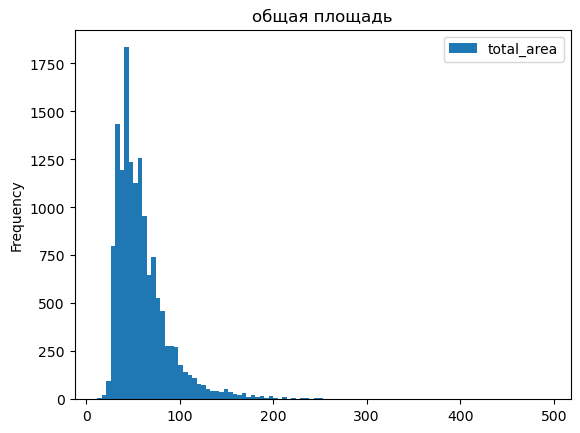

In [187]:
data2.plot(y='total_area', kind='hist', bins=100, title='общая площадь')

Для наглядности сократим диапазон, исключив квартиры c аномально большой площадью.

<AxesSubplot:title={'center':'общая площадь'}, ylabel='Frequency'>

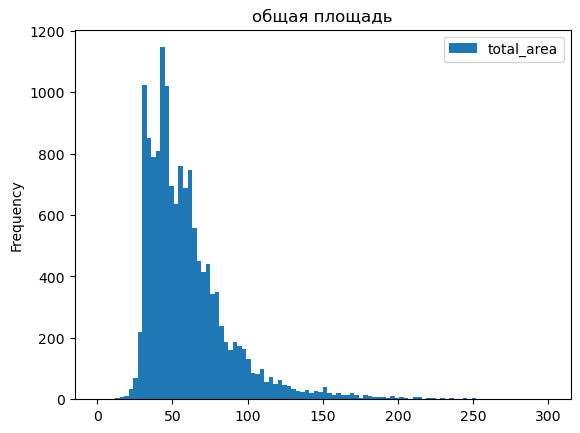

In [188]:
data2.plot(y='total_area', kind='hist', bins=100, title='общая площадь', range=(0,300))

**Вывод:**   
Чаще всего встречаются квартиры общей площадью около 30 кв.м и 55 кв.м.

#### Жилая площадь

<AxesSubplot:title={'center':'жилая площадь'}, ylabel='Frequency'>

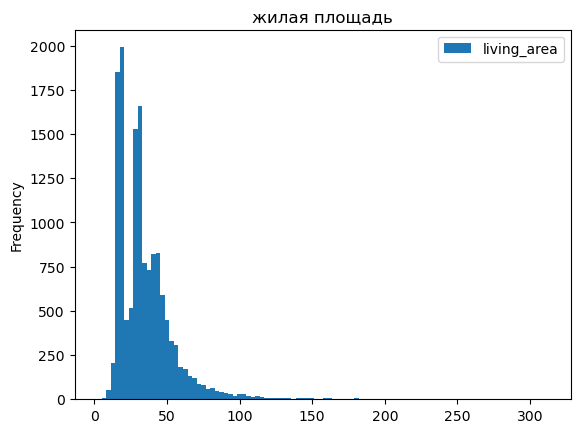

In [189]:
data2.plot(y='living_area', kind='hist', bins=100, title='жилая площадь')

Для наглядности сократим диапазон, исключив квартиры c аномально большой жилой площадью.

<AxesSubplot:title={'center':'жилая площадь'}, ylabel='Frequency'>

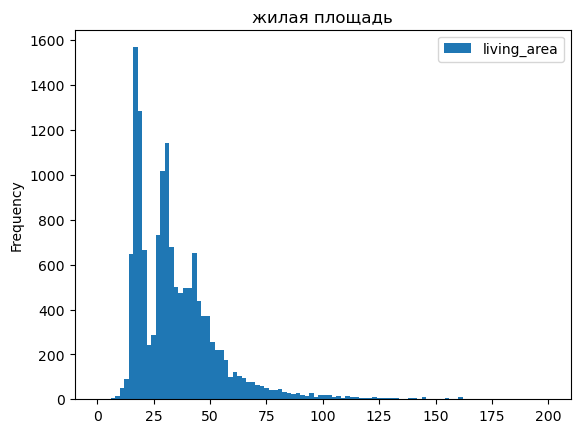

In [190]:
data2.plot(y='living_area', kind='hist', bins=100, title='жилая площадь', range=(0,200))

**Вывод:**   
Чаще всего встречаются квартиры с жилой площадью около 15 кв.м и 30 кв.м.

#### Площадь кухни

<AxesSubplot:title={'center':'площадь кухни'}, ylabel='Frequency'>

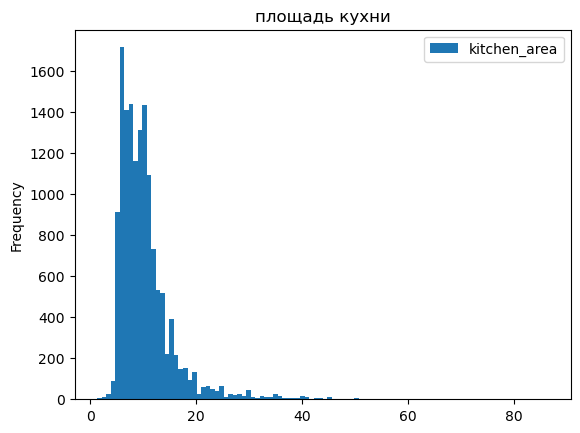

In [191]:
data2.plot(y='kitchen_area', kind='hist', bins=100, title='площадь кухни')

Для наглядности сократим диапазон, исключив квартиры c аномально большой площадью кухни.

<AxesSubplot:title={'center':'площадь кухни'}, ylabel='Frequency'>

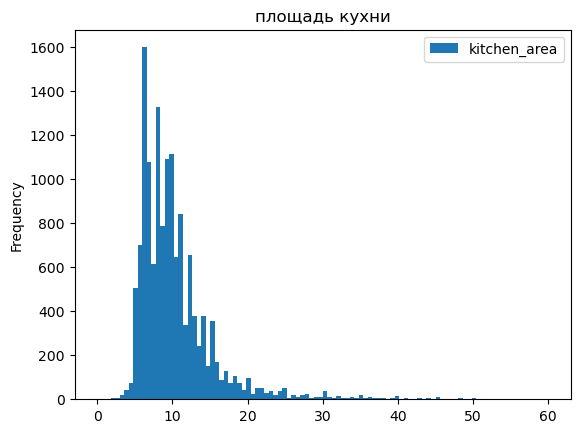

In [192]:
data2.plot(y='kitchen_area', kind='hist', bins=100, title='площадь кухни', range=(0,60))

**Вывод:**   
Чаще всего встречаются квартиры с площадью кухни около 5 кв.м и 9 кв.м.

#### Высота потолоков

<AxesSubplot:title={'center':'высота потолков'}, ylabel='Frequency'>

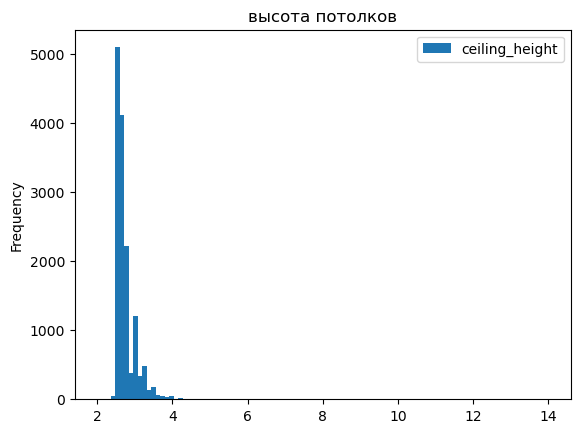

In [193]:
data2.plot(y='ceiling_height', kind='hist', bins=100, title='высота потолков')

Для наглядности сократим диапазон, исключив квартиры c аномально большой высотой потолков.

<AxesSubplot:title={'center':'высота потолков'}, ylabel='Frequency'>

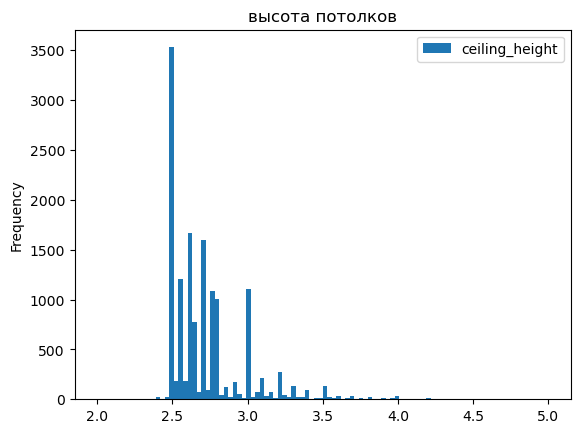

In [194]:
data2.plot(y='ceiling_height', kind='hist', bins=100, title='высота потолков', range=(2,5))

**Вывод:**   
Чаще всего встречаются квартиры с высотой потолков 2.5 м.

#### Этаж

<AxesSubplot:title={'center':'этаж квартиры'}, ylabel='Frequency'>

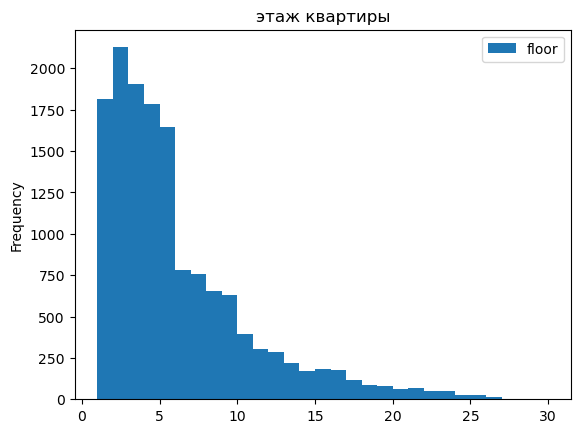

In [195]:
data2.plot(y='floor', kind='hist', bins=29, title='этаж квартиры')

**Вывод:**   
Чаще всего встречаются квартиры на 3 и 4 этажах.

#### Тип этажа (первый, последний, другой)

<AxesSubplot:title={'center':'этаж квартиры'}>

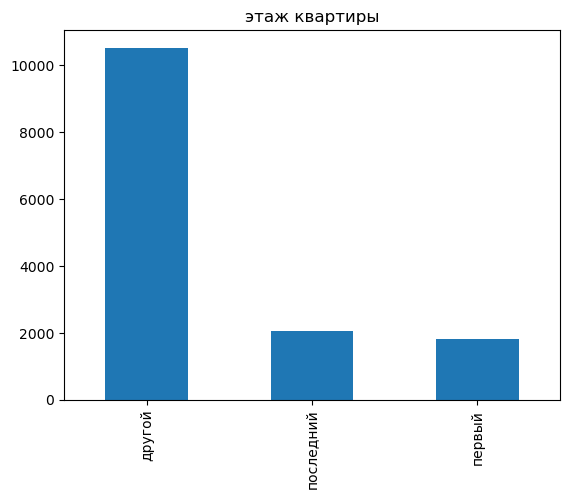

In [196]:
data2['floor_type'].value_counts().plot(kind='bar', title='этаж квартиры')

Здесь лучше всего использовать круговую диаграмму.

<AxesSubplot:title={'center':'этаж квартиры'}, ylabel='floor_type'>

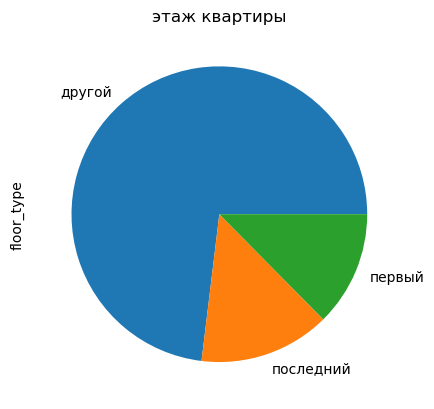

In [197]:
data2['floor_type'].value_counts().plot(kind='pie', title='этаж квартиры')

**Вывод:**   
Примерно четверть всех квартир располагаются на первой или последних этажах.

#### Общее количество этажей в доме

<AxesSubplot:title={'center':'общее количество этажей в доме'}, ylabel='Frequency'>

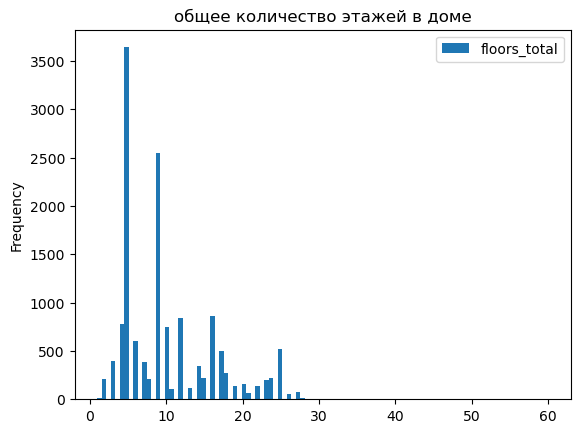

In [198]:
data2.plot(y='floors_total', kind='hist', bins=100, title='общее количество этажей в доме')

**Вывод:**   
Чаще всего встречаются квартиры в 5-ти этажных и 9-эти этажных домах.

#### Расстояние до центра города в метрах

<AxesSubplot:title={'center':'расстояние до центра города в метрах'}, ylabel='Frequency'>

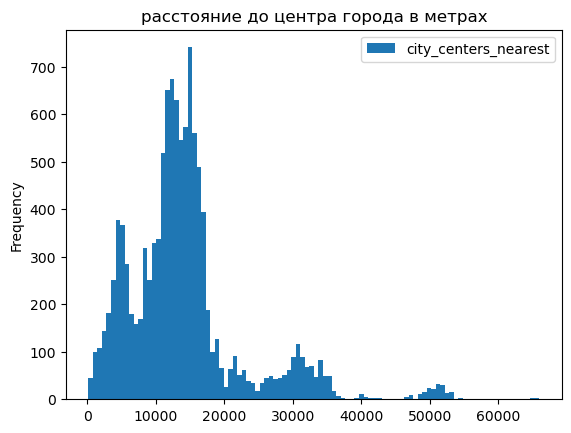

In [199]:
data2.plot(y='city_centers_nearest', kind='hist', bins=100, title='расстояние до центра города в метрах')

**Вывод:**   
Чаще всего встречаются квартиры на расстоянии примерно 15000 м от центра города.

#### Расстояние до ближайшего аэропорта

<AxesSubplot:title={'center':'расстояние до ближайшего аэропорта'}, ylabel='Frequency'>

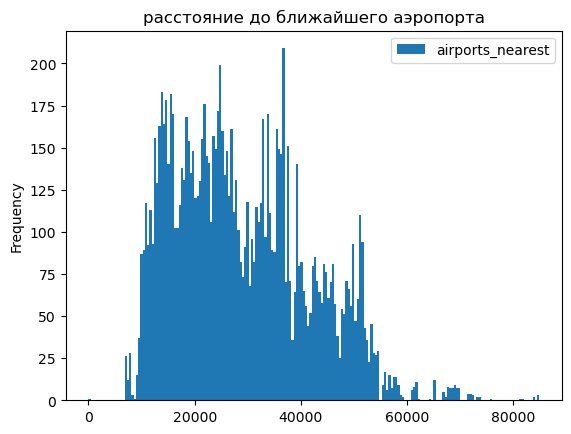

In [200]:
data2.plot(y='airports_nearest', kind='hist', bins=200, title='расстояние до ближайшего аэропорта')

**Вывод:**   
Чаще всего встречаются квартиры на расстоянии примерно 15000 м, 25000 м, 37000 м от ближайшего аэропорта.

#### Расстояние до ближайшего парка

<AxesSubplot:title={'center':'расстояние до ближайшего парка'}, ylabel='Frequency'>

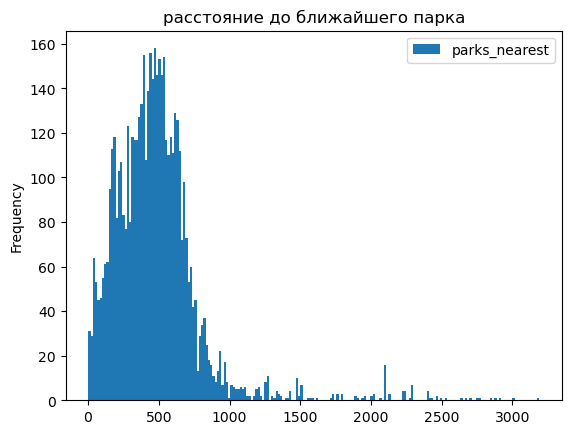

In [201]:
data2.plot(y='parks_nearest', kind='hist', bins=200, title='расстояние до ближайшего парка')

**Вывод:**   
Чаще всего встречаются квартиры на расстоянии примерно чуть больше 500 м до ближайшего парка.

#### День недели публикации объявления

<AxesSubplot:title={'center':'день недели публикации объявления'}, ylabel='Frequency'>

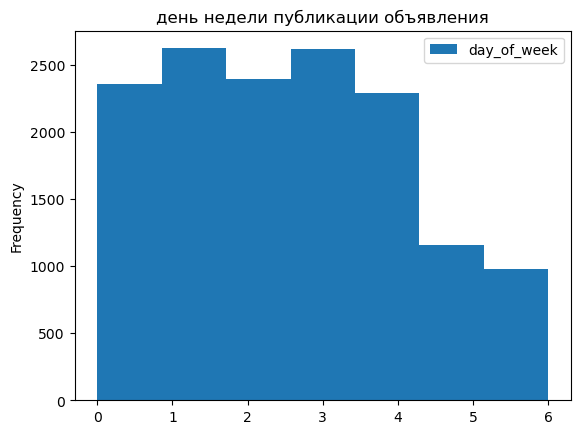

In [202]:
data2.plot(y='day_of_week', kind='hist', bins=7, title='день недели публикации объявления')

#### День недели и месяц публикации объявления

<AxesSubplot:title={'center':'день недели публикации объявления'}, ylabel='Frequency'>

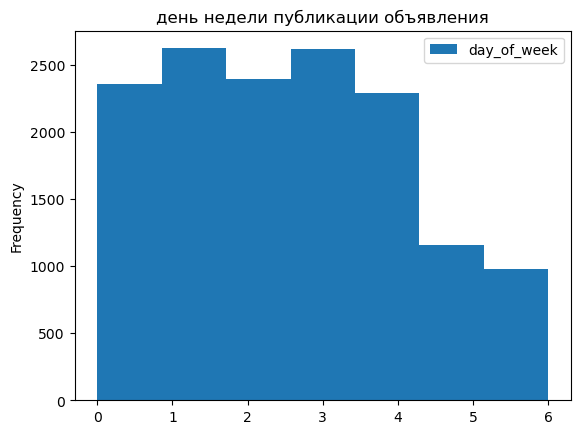

In [203]:
data2.plot(y='day_of_week', kind='hist', bins=7, title='день недели публикации объявления')

<AxesSubplot:title={'center':'месяц публикации объявления'}, ylabel='Frequency'>

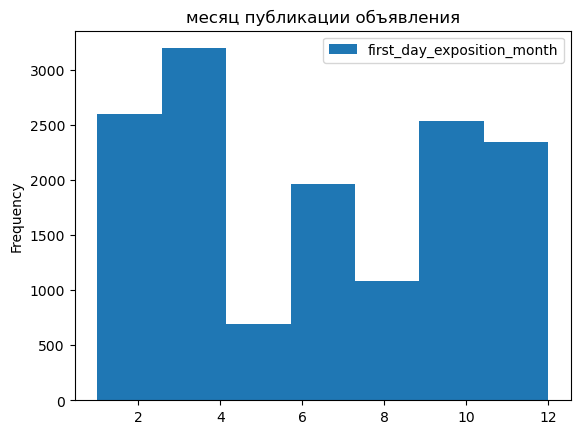

In [204]:
data2.plot(y='first_day_exposition_month', kind='hist', bins=7, title='месяц публикации объявления')

**Вывод**:   
Пользователи чаще публикуют объявления в будние дни.
Пользователи чаще публикуют объявлений в первые и последние месяцы года.

### 4.2. Изучим, как быстро продавались квартиры 

<AxesSubplot:title={'center':'сколько дней было размещено объявление (от публикации до снятия)'}, ylabel='Frequency'>

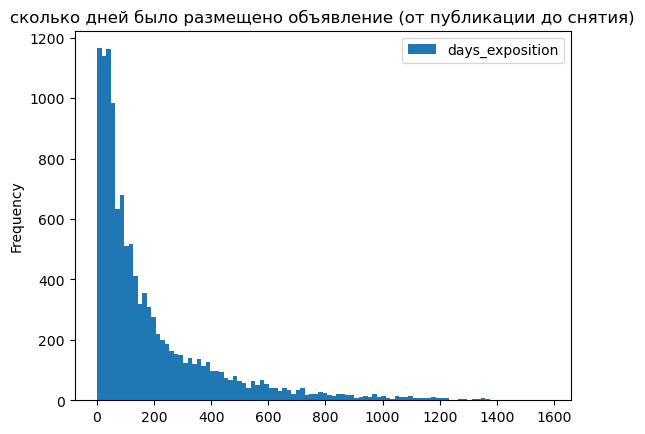

In [205]:
data2.plot(y='days_exposition', kind='hist', bins=100, title='сколько дней было размещено объявление (от публикации до снятия)')

Длительность объявлений свыше 400 дней — уже редки. Дольше 1000 дней объявлений минимальное количество. А на участке более 1200 дней гистограмма сливается с нулём.   
Выведем на экран гистограмму со значениями до 600 дней, чтобы ближе ознакомиться с наиболее частыми значениями. 

<AxesSubplot:title={'center':'сколько дней было размещено объявление (от публикации до снятия)'}, ylabel='Frequency'>

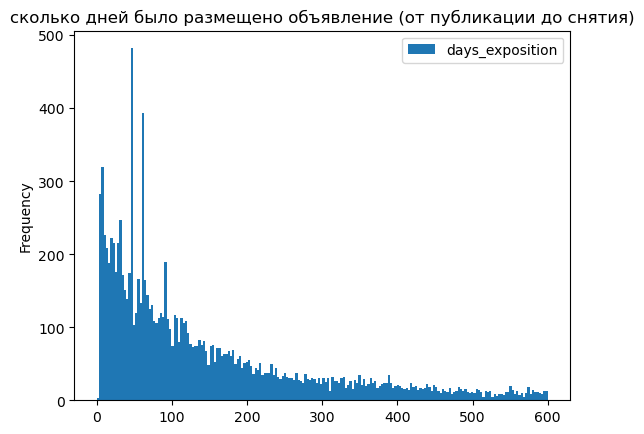

In [206]:
data2.plot(y='days_exposition', kind='hist', bins=200, 
title='сколько дней было размещено объявление (от публикации до снятия)', range=(0,600))

На гистограмме заметны выбросы около 50 дней. Вероятно, что выбросы связаны с автоматическим снятием объявления агрегатором.   
Уточним, на каких именно днях эти выбросы.

In [207]:
data['days_exposition'].value_counts()

45.0      880
60.0      538
7.0       234
30.0      208
90.0      204
         ... 
1021.0      1
1362.0      1
1105.0      1
795.0       1
971.0       1
Name: days_exposition, Length: 1141, dtype: int64

Аномалии содержат 45 и 60 дни.   
Ознакомимся с характерными значениями столбца, исключив аномалии.

In [208]:
data2.query('days_exposition != 45 and days_exposition != 60')['days_exposition'].describe()

count    11694.000000
mean       192.693775
std        229.990021
min          1.000000
25%         44.000000
50%        106.000000
75%        252.000000
max       1580.000000
Name: days_exposition, dtype: float64

**Вывод:**   
Медианное время продажи квартиры - 106 дней. Среднее значение - 192 день.   
25% значений - менее 44 дней. Такие продажи считаются быстрыми.   
Другие 25% значений - 252 дней и более. Такие продажи считаются долгими. 

### 4.3. Далее изучим, какие факторы больше всего влияют на общую (полную) стоимость объекта:
- общая площадь;
- жилая площадь;
- площадь кухни;
- количество комнат;
- этаж, на котором расположена квартира (первый, последний, другой);
- дата размещения (день недели, месяц, год).

Выведем на экран матрицу корреляции между стоимостью объекта и параметрами площади (общая, жилая площадь, кухня).

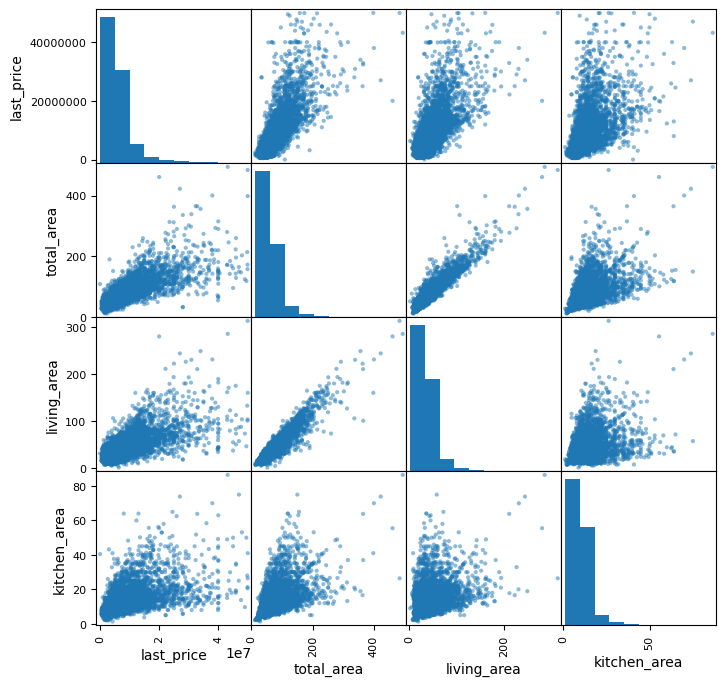

In [209]:
pd.plotting.scatter_matrix(data2[['last_price', 'total_area', 'living_area', 'kitchen_area']], 
                           figsize=(8, 8));


**Вывод:** Все параметры площади положительно влияют на цену квартиры. При этом площадь кухни имеет чуть меньшее влияние на цену.

Выведем на экран график зависимости между стоимостью объекта и количеством комнат.

<AxesSubplot:xlabel='rooms'>

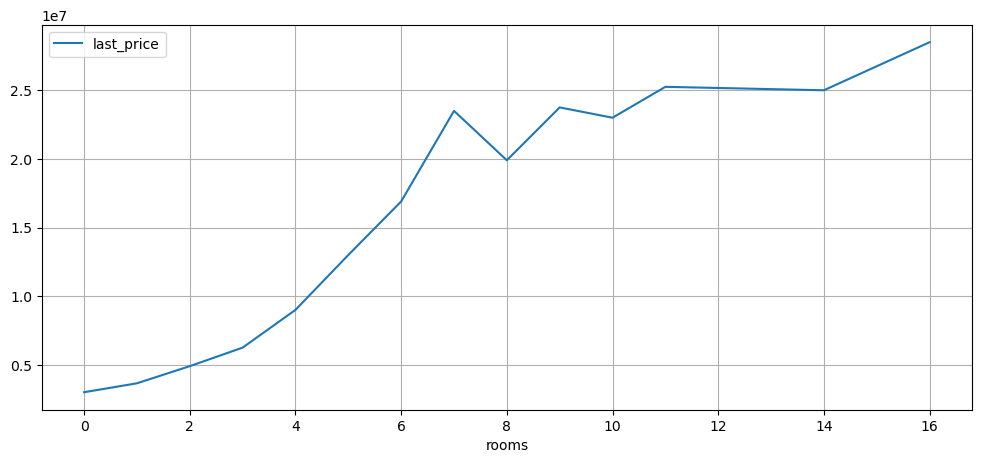

In [210]:
(
data2
    .pivot_table(index='rooms', values='last_price', aggfunc='median')
    .plot(grid=True, figsize=(12, 5))
)

In [211]:
data2.value_counts('rooms')

rooms
2     4843
1     4605
3     3768
4      778
5      209
0       81
6       63
7       34
9        6
8        5
10       3
11       2
14       1
16       1
dtype: int64

**Вывод**: количество комнат положительно влияет на стоимость объекта. Данные показывают, что цена растёт до 7 комнат. После этого медианная стоимость не изменяется, за исключением квартир с 15 и 16 комнатами. При этом это лишь единичные значения, которые не стоит учитывать для оценки корреляции.

Выведем на экран столбчатую диаграмму с медианными значениями стоимости объекта для каждого типа этажа.

<AxesSubplot:xlabel='floor_type'>

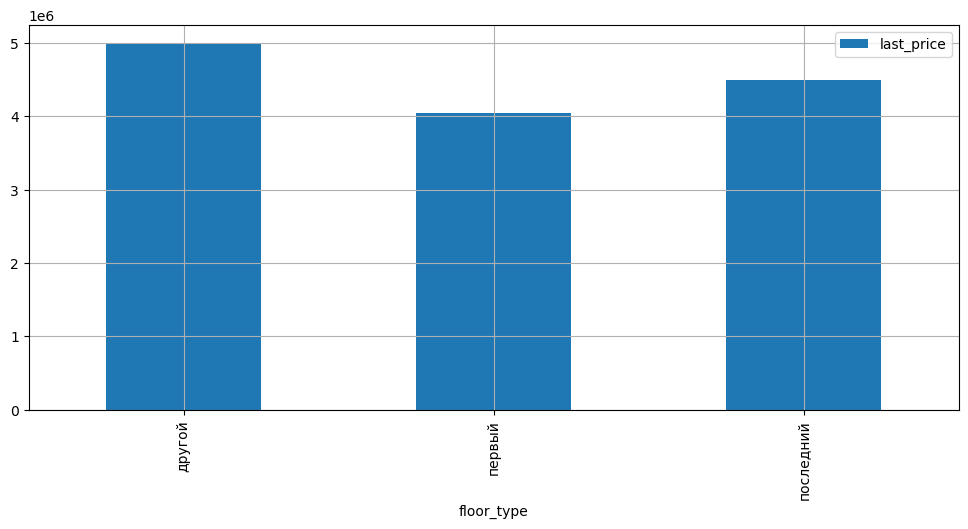

In [212]:
(
data2
    .pivot_table(index='floor_type', values='last_price', aggfunc='median')
    .plot(grid=True, figsize=(12, 5), kind='bar')
)

**Вывод**: наименьшая цена за квартиры на 1 этаже - 4 млн рублей. На последнем этаже медиана 4,5 млн рублей. Наконец, медианная цена квартиры, которые не находятся ни на первом, ни на последнем этажах - 5 млн рублей.   
Таким образом, выделенные нами типы этажа влияют на стоимость квартиры.

Выведем на экран столбчатые диаграммы с медианными значениями стоимости объекта по каждому дню недели, месяцу в году, году.

<AxesSubplot:title={'center':'Изменения стоимости объектов по дню недели публикации'}, xlabel='day_of_week'>

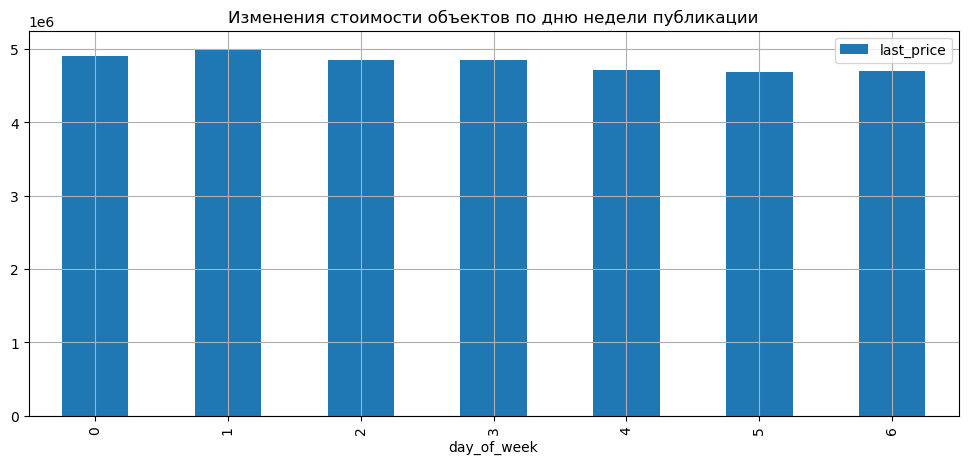

In [213]:
(
data2
    .pivot_table(index='day_of_week', values='last_price', aggfunc='median')
    .plot(grid=True, figsize=(12, 5), kind='bar', title='Изменения стоимости объектов по дню недели публикации')
)

<AxesSubplot:title={'center':'Изменения стоимости объектов по месяцу публикации'}, xlabel='first_day_exposition_month'>

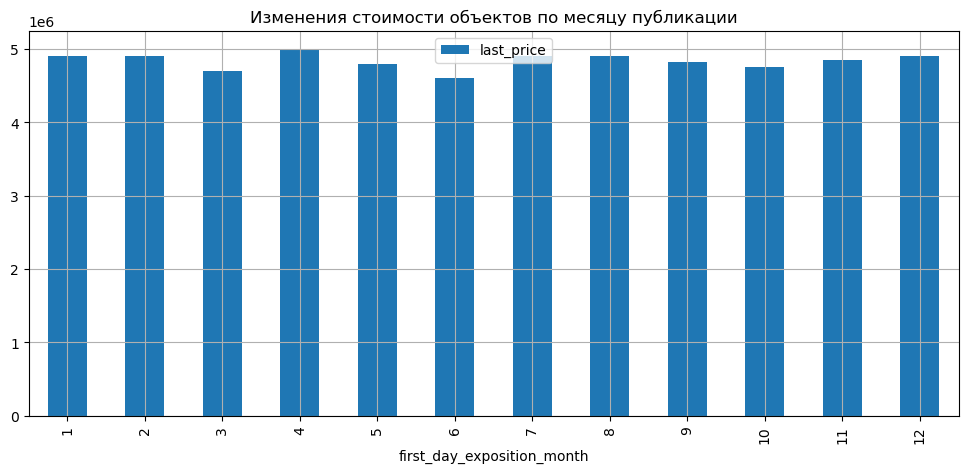

In [214]:
(
data2
    .pivot_table(index='first_day_exposition_month', values='last_price', aggfunc='median')
    .plot(grid=True, figsize=(12, 5), kind='bar', \
         title='Изменения стоимости объектов по месяцу публикации')
)

<AxesSubplot:title={'center':'Изменение стоимости объектов по году публикации'}, xlabel='first_day_exposition_year'>

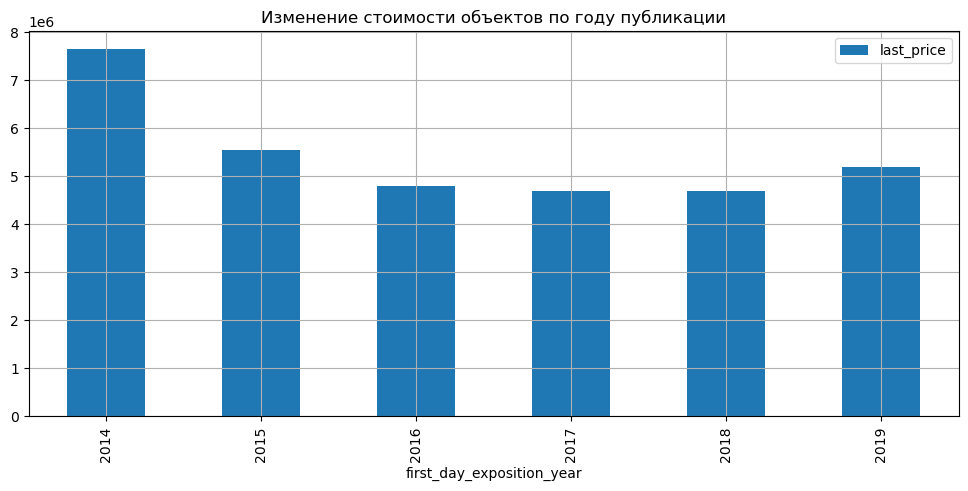

In [215]:
(
data2
    .pivot_table(index='first_day_exposition_year', values='last_price', aggfunc='median')
    .plot(grid=True, figsize=(12, 5), kind='bar',\
         title='Изменение стоимости объектов по году публикации')
)


**Вывод**:   
1) день недели или месяц публикации объявления существенно не влияет на стоимость продажи квартиры. Медианная стоимость объектов в каждый день недели, месяц года практически близка к 5 млн рублей. При этом можно заметить тренд, что в пятницу и выходные значение медианной стоимости меньше, чем в другие дни. Что касается месяцев, то самые низкие значения имеют март и июнь.   
2) Диаграмма медианной стоимости объектов с 2014 по 2019 годы показывает, что самая высокая стоимость продажи была в 2014 году - 8 млн рублей. В 2015 году медианная стоимость резко упала до 5,5 млн рублей и продолжала падение до 2017 года. В 2017-2018 годах стоимость закрепилась на отметке чуть больше 4,5 млн рублей. А в 2019 году выросла больше 5 млн рублей.

### 4.4. Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Населённые пункты с самой высокой и низкой стоимостью квадратного метра.

Для начала определим нужные нам 10 населённых пунктов с наибольшим числом объявлений.

In [216]:
data2['locality_name'].value_counts().head(10)

Санкт-Петербург    10009
Всеволожск           271
Пушкин               234
Мурино               228
Шушары               217
Колпино              203
Кудрово              194
Гатчина              149
Петергоф             145
Парголово            137
Name: locality_name, dtype: int64

1) Составим датасет только с объектами из этих населённых пунктов;   
2) Построим сводную таблицу со средней ценой квадратного метра в этих населённых пунктах, используя созданный нами столбец price_per_m с ценой квадратного метра.

In [217]:
top10_cities = ['Санкт-Петербург', 'Всеволожск', 'Пушкин', 'поселок Шушары', 'поселок Мурино', 'Колпино', 'Гатчина', 'Петергоф', 'поселок Парголово', 'Сестрорецк']
data2_top10_cities = data2.query('locality_name in @top10_cities')


In [218]:
data2_top10_cities.pivot_table(index='locality_name', values='price_per_m').sort_values(by='price_per_m', ascending=False)

,price_per_m
locality_name,
Санкт-Петербург,113037.390586
Пушкин,103920.487863
Сестрорецк,102267.327209
Петергоф,85554.144690
Колпино,75938.525517
Гатчина,69992.693356
Всеволожск,67434.629963


**Вывод:**   
Самая высокая средняя цена квадратного метра - в Санкт-Петербурге, 114412 рублей.   
Самая низкая средняя цена квадратного метра - во Всеволожске, 67435 рублей.

### 4.5. Средняя цена каждого километра от центра города в Санкт-Петербурге.

Для решения задачи выполним следующие шаги:   
1) Составим сводную таблицу со средними значениями полной цены квартиры и цены квадратного метра в Санкт-Петербурге по каждому километру от центра;   
2) Построим график, отображающий среднюю стоимость полной цены квартиры для каждого километра от центра;   
3) Построим график, отображающий среднюю стоимость квадратного метра для каждого километра от центра.

In [219]:
data2_spb_centers_avg = data2.query('locality_name == "Санкт-Петербург"')\
.pivot_table(index = 'city_centers_nearest_km', values=['last_price', 'price_per_m'])
data2_spb_centers_avg['last_price_k'] = round(data2_spb_centers_avg['last_price'] / 1000)
data2_spb_centers_avg

,last_price,price_per_m,last_price_k
city_centers_nearest_km,,,
0.0,1.858112e+07,178256.049412,18581.0
1.0,1.345129e+07,149376.116825,13451.0
2.0,1.264202e+07,139888.975588,12642.0
3.0,1.036010e+07,117936.028814,10360.0
4.0,1.169000e+07,128872.009196,11690.0
5.0,1.185462e+07,134870.521155,11855.0
6.0,1.219702e+07,138730.601170,12197.0
7.0,1.074856e+07,138229.816761,10749.0
8.0,9.675233e+06,126160.228618,9675.0


In [220]:
import matplotlib.pyplot as plt

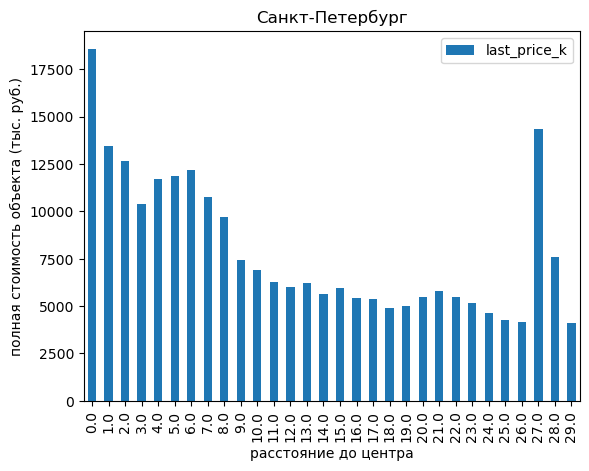

In [221]:
data2_spb_centers_avg.plot(y='last_price_k', kind='bar', title='Санкт-Петербург')
plt.xlabel('расстояние до центра')
plt.ylabel('полная стоимость объекта (тыс. руб.)')
plt.show()

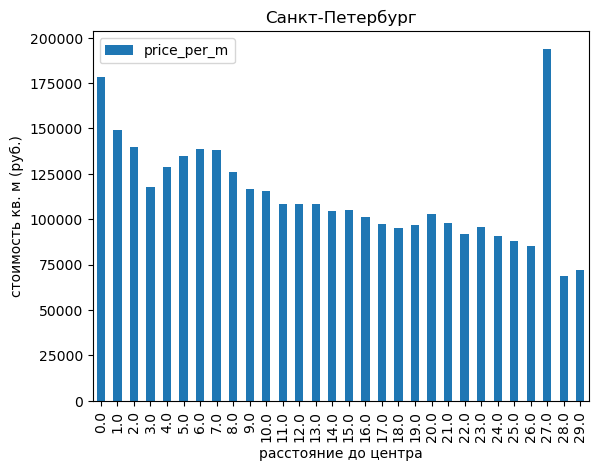

In [222]:
data2_spb_centers_avg.plot(y='price_per_m', kind='bar', title='Санкт-Петербург')
plt.xlabel('расстояние до центра')
plt.ylabel('стоимость кв. м (руб.)')
plt.show()

**Вывод:**   
Самые дорогие квартиры находятся в самом центре Санкт-Петербурга. Средняя стоимость квартир примерно 22 млн рублей, а стоимость квадратного метра около 190 тыс. рублей.    
Примечательно, что примерно такой же показатель средней цены квадратного метра у квартир, находящихся в 27 км от центра. Однако средняя общая стоимость не превышает 15 млн рублей.   
Самые низкие значения по полной стоимости объекта имеют квартиры на расстоянии с 9 по 26 км и 29 км от центра.   
Самые низкие значения по цене квадратного метра имеют квартиры на расстоянии с 17 по 19 км, 22 км, с 24 по 27 км и с 28 по 29 км. 

## Общий вывод

**Основные тренды и характеристики:**   
Основную долю рынка квартир в Санкт-Петербурге и ближайших населённых пунктах составляют квартиры со следующими параметрами:
- общая площадь 30 и 55 кв. м.;
- высота потолков - 2.5 м;
- 3 или 4 этаж;
- 5-эти этажный и 9-ти этажный дом;
- 15 км от центра города.

**Продажа квартир и объявления:**
- продажа квартиры быстре 44 дней считается быстрой;   
- продажа квартиры дольше 252 дней считается долгой.   
  
Чаще всего объявления появляются в будние дни, а также в первые и последние месяцы года.

**Что влияет на цену квартиры?**   
Следующие параметры увеличивают рыночную стоимость квартиры:
1. Общая площадь;
2. Расположение не на первом и не на последнем этаже;
3. Количество комнат.

**Самые дорогие и самые дешевые населенные пункты:**  Среди топ-10 населенных пунктов по количеству объявлений самая дорогая цена за кв. м в Санкт-Петербурге, Пушкине и Сестрорецке. Самые дешевые квартиры в Гатчине и во Всеволожске.



   
**Санкт-Петербург:** Самые дорогие квартиры Санкт-Петербурга находятся в 7 км от центра Санкт-Петербурга: цена квартир от 10 млн рублей и более, цена кв. м примерно от 120 тыс. рублей. Цена квартир в большей дальности от центра не превышает 10 млн рублей и средняя цена равно примерно 5 млн рублей, за исключением квартир на расстоянии от 27 км: на этом расстоянии средняя общая цена и цена кв. м примерно как у квартир в самом центре города. 